In [2]:
file = open ('./adult.data','r')

In [3]:
def chr_int(a):
        if a.isnumeric():
            return int(a)
        else:
            return a
data=[]
for line in file:
        data1=line.split(',')
        if len(data1)==15:
            data.append([int(data1[0]),(data1[1]),
                        int (data1[2]), data1[3],
                        int (data1[4]), data1[5],
                        data1[6], data1[7], data1[8],
                        data1[9], int(data1[10]),
                        int(data1[11]),
                        int(data1[12]),
                        data1[13],data1[14],
                        ])

In [4]:
print (data[1:5])

[[50, ' Self-emp-not-inc', 83311, ' Bachelors', 13, ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', 0, 0, 13, ' United-States', ' <=50K\n'], [38, ' Private', 215646, ' HS-grad', 9, ' Divorced', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', 0, 0, 40, ' United-States', ' <=50K\n'], [53, ' Private', 234721, ' 11th', 7, ' Married-civ-spouse', ' Handlers-cleaners', ' Husband', ' Black', ' Male', 0, 0, 40, ' United-States', ' <=50K\n'], [28, ' Private', 338409, ' Bachelors', 13, ' Married-civ-spouse', ' Prof-specialty', ' Wife', ' Black', ' Female', 0, 0, 40, ' Cuba', ' <=50K\n']]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import IPython
import sklearn
import seaborn as sns

In [6]:
df=pd.DataFrame(data)
df.columns=['age','type_employer', 'fnlwgt',
            'education','education_num','marital status',
            'occupation','relationship','race',
            'sex','capital_gain', 'capital_loss', 
            'hr_per_week','country','income']

In [7]:
df

,age,type_employer,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K\n


In [7]:
counts=df.groupby('age').size()
print (counts.head())

age
17    395
18    550
19    712
20    753
21    720
dtype: int64


In [8]:
df.shape

(32561, 15)

In [9]:
df.capital_gain

0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: capital_gain, Length: 32561, dtype: int64

In [10]:
(counts.tail())

age
85     3
86     1
87     1
88     3
90    43
dtype: int64

In [11]:
counts1=df.groupby('country').size()
counts1.head()

country
 ?           583
 Cambodia     19
 Canada      121
 China        75
 Columbia     59
dtype: int64

In [12]:
counts1=df.groupby('country').size()
print(counts1)

country
 ?                               583
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Holand-Netherlands                1
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                       

In [13]:
ml=df[(df.sex==' Male')]
fml=df[(df.sex==' Female')]
ml1=df[(df.sex==' Male') & (df.income==' >50K\n')]
fm1=df[(df.sex==' Female') & (df.income==' >50K\n')]

In [14]:
ml1

,age,type_employer,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K\n
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K\n
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K\n
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K\n
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,34,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K\n
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K\n
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K\n
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K\n


In [15]:
fml

,age,type_employer,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K\n
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K\n
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K\n
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K\n
32549,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K\n
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n


In [16]:
df1=df[(df.hr_per_week > 40)]
df1

,age,type_employer,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K\n
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K\n
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K\n
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K\n
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K\n
32543,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K\n
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K\n
32550,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K\n


In [17]:
df2=df[(df.sex==' Male')]
df2

,age,type_employer,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K\n
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K\n
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n


In [176]:
df["type_employer"].tolist()

[' State-gov',
 ' Self-emp-not-inc',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Self-emp-not-inc',
 ' Private',
 ' Private',
 ' Private',
 ' State-gov',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Self-emp-not-inc',
 ' Private',
 ' Private',
 ' Self-emp-not-inc',
 ' Private',
 ' Private',
 ' Federal-gov',
 ' Private',
 ' Private',
 ' Local-gov',
 ' Private',
 ' ?',
 ' Private',
 ' Private',
 ' Local-gov',
 ' Private',
 ' Private',
 ' Federal-gov',
 ' State-gov',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Self-emp-not-inc',
 ' Private',
 ' Self-emp-not-inc',
 ' Private',
 ' Private',
 ' Private',
 ' Federal-gov',
 ' Private',
 ' Private',
 ' State-gov',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Federal-gov',
 ' Self-emp-inc',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' ?',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Self-emp-inc',
 ' ?',
 ' Private',
 ' 

In [19]:
print(len(ml))
print(len(fml))
print(len(ml1))
print(len(fm1))

21790
10771
6662
1179


In [20]:
df["hr_per_week"].mean()

40.437455852092995

In [21]:
df["capital_gain"].mean()

1077.6488437087312

In [22]:
df["capital_gain"].std()

7385.292084839299

In [23]:
df["capital_gain"].max()

99999

In [24]:
df['hr_per_week'].std()

12.34742868173081

In [25]:
df['hr_per_week'].max()

99

In [26]:
df1=df[(df.income==' >50K\n')]

In [27]:
h=(float(len(df1))/float(len(df)))*(100.0)

In [28]:
len(df1)

7841

In [29]:
len(df)

32561

In [30]:
print ("The rate of people with high income is",h,"%." )

The rate of people with high income is 24.080955744602438 %.


In [31]:
h1=(float(len(df[(df.sex==' Male')]))/float(len(df)))*(100.0)

In [32]:
print ("The percentage of men is ",h1,"%." )

The percentage of men is  66.92054912318419 %.


In [33]:
h2=(float(len(df[(df.sex==' Female')]))/float(len(df)))*(100.0)

In [34]:
print ("The percentage of women is ",h2,"%." )

The percentage of women is  33.07945087681583 %.


In [35]:
h3=(float(len(df[(df.income==' <=50K\n')]))/float(len(df)))*(100.0)

In [36]:
print ("The rate of people with low income is",h3,"%." )

The rate of people with low income is 75.91904425539757 %.


In [37]:
df["hr_per_week"].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hr_per_week, dtype: float64

In [38]:
df["capital_gain"].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

In [39]:
df["education"].describe()

count        32561
unique          16
top        HS-grad
freq         10501
Name: education, dtype: object

In [40]:
df["fnlwgt"].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [41]:
df["occupation"].describe()

count               32561
unique                 15
top        Prof-specialty
freq                 4140
Name: occupation, dtype: object

In [42]:
df["fnlwgt"].mean()

189778.36651208502

In [43]:
df["fnlwgt"].median()

178356.0

In [44]:
df["capital_gain"].median()

0.0

In [45]:
df["hr_per_week"].median()

40.0

<Axes: >

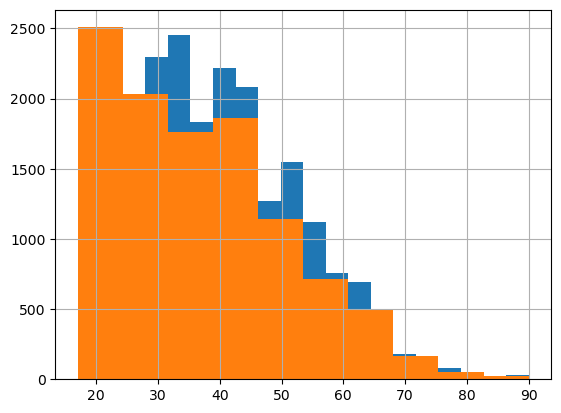

In [46]:
ml_age=ml['age']
ml_age.hist(histtype='stepfilled', bins=20)
fml1_age=fml['age']
fml1_age.hist(histtype='stepfilled', bins=10)

In [47]:
plt.hist?

In [59]:
adult=pd.read_csv('./adult.data',header=None)

In [60]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [74]:
df_ad=pd.DataFrame(adult)
df_ad.head = ['age','type_employer', 'fnlwgt',
            'education','education_num','marital status',
            'occupation','relationship','race',
            'sex','capital_gain', 'capital_loss', 
            'hr_per_week','country','income']

In [75]:
df

,age,type_employer,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K\n


In [77]:
df['age'].max()

90

In [78]:
df['age'].min()

17

<Axes: >

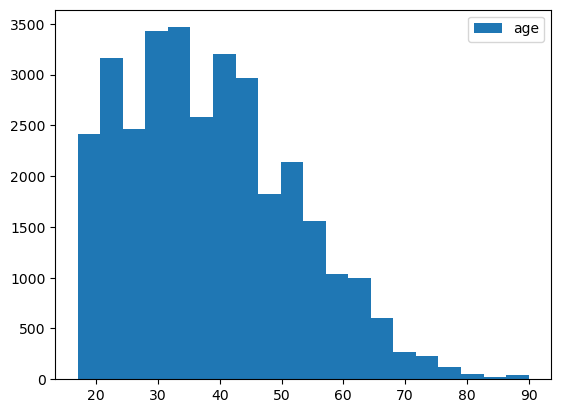

In [109]:
dfa=df['age']
dfa.hist(grid=False, legend=True, bins = 20)

dfa.hist(bins=10)

In [94]:
df['age'].median()

37.0

In [95]:
df['age'].mean()

38.58164675532078

In [96]:
df['age'].mode()

0    36
Name: age, dtype: int64

In [101]:
df['age'].std()

13.640432553581146

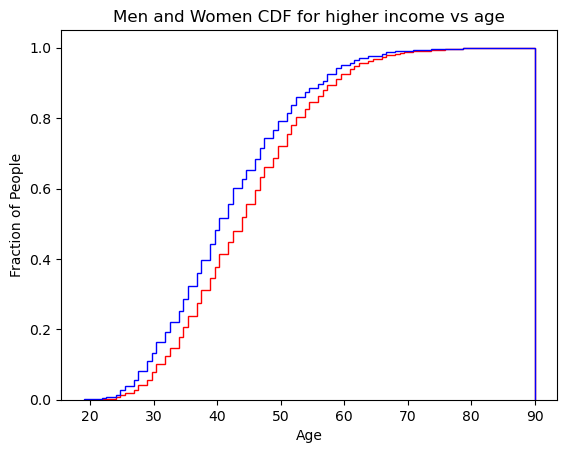

In [173]:
ml1=df[(df.sex==' Male') & (df.income==' >50K\n')]
fm1=df[(df.sex==' Female') & (df.income==' >50K\n')]
m1=ml1['age']
f1=fm1['age']
m1.hist(grid=False,density=True, cumulative=True, color='red', histtype='step', bins=100)
f1.hist(grid=False,density=True, cumulative=True, color='blue', histtype='step', bins=100)
plt.xlabel('Age')
plt.ylabel('Fraction of People')
plt.title('Men and Women CDF for higher income vs age')
plt.show()

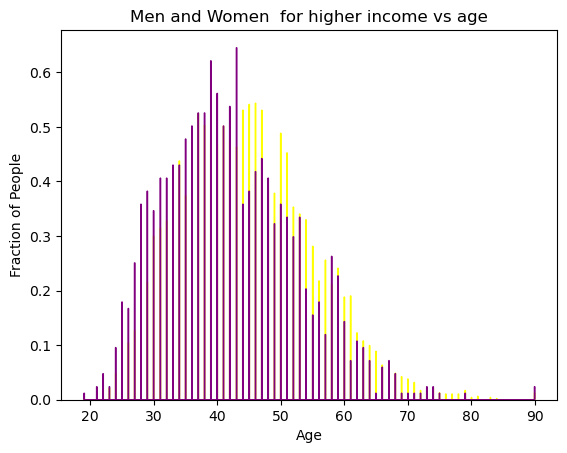

In [9]:
ml1=df[(df.sex==' Male') & (df.income==' >50K\n')]
fm1=df[(df.sex==' Female') & (df.income==' >50K\n')]
m1=ml1['age']
f1=fm1['age']
m1.hist(grid=False,density=True, color='yellow', histtype='step', bins=1000)
f1.hist(grid=False,density=True, color='purple', histtype='step', bins=1000)
plt.xlabel('Age')
plt.ylabel('Fraction of People')
plt.title('Men and Women  for higher income vs age')
plt.show()

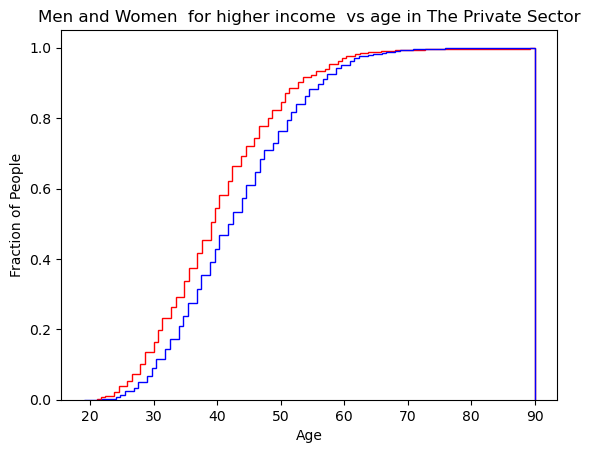

In [180]:
ml1=df[(df.type_employer==' Private') & (df.income==' >50K\n') & (df.sex==' Female')]
fm1=df[(df.type_employer==' Private') & (df.income==' >50K\n') & (df.sex==' Male')] 
m1=ml1['age']
f1=fm1['age']
m1.hist(grid=False,density=True, cumulative=True, color='red', histtype='step', bins=100)
f1.hist(grid=False,density=True, cumulative=True, color='blue', histtype='step', bins=100)
plt.xlabel('Age')
plt.ylabel('Fraction of People')
plt.title('Men and Women  for higher income  vs age in The Private Sector')
plt.show()

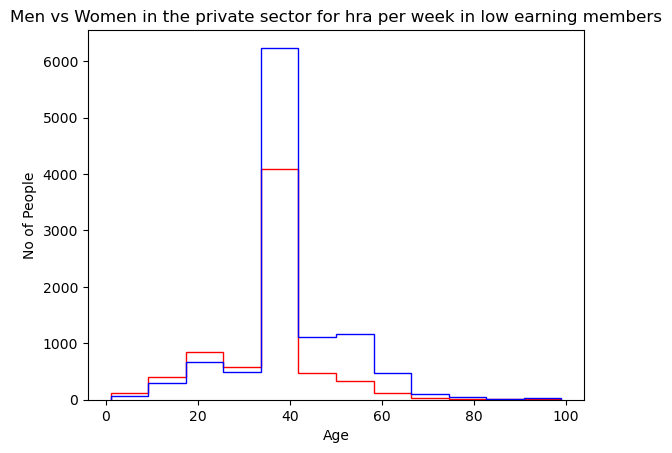

In [188]:
ml1=df[(df.type_employer==' Private') & (df.income==' <=50K\n') & (df.sex==' Female')]
fm1=df[(df.type_employer==' Private') & (df.income==' <=50K\n') & (df.sex==' Male')] 
m1=ml1['hr_per_week']
f1=fm1['hr_per_week']
m1.hist(grid=False, color='red', histtype='step', bins=12)
f1.hist(grid=False, color='blue', histtype='step', bins=12)
plt.xlabel('Age')
plt.ylabel('No of People')
plt.title('Men vs Women in the private sector for hra per week in low earning members')
plt.show()

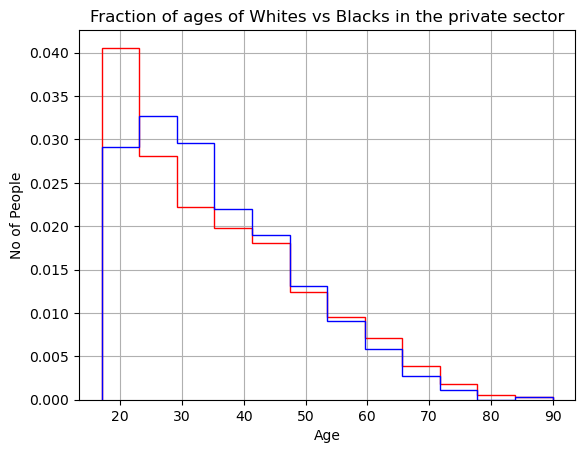

In [193]:
ml1=df[(df.race==' White') & (df.income==' <=50K\n') & (df.sex==' Female')]
fm1=df[(df.race==' Black') & (df.income==' <=50K\n') & (df.sex==' Male')] 
m1=ml1['age']
f1=fm1['age']
m1.hist(grid=True,density=True, color='red', histtype='step', bins=12)
f1.hist(grid=True,density=True, color='blue', histtype='step', bins=12)
plt.xlabel('Age')
plt.ylabel('No of People')
plt.title('Fraction of ages of Whites vs Blacks in the private sector')
plt.show()

In [8]:
df2_rfnd = df.drop( df.index[( df.income == ' >50K\n') &
                             ( df['age'] > df['age'].median()+35) &
                             ( df['age'] > df['age'].median()-15)])

In [10]:
fml1_age=ml1['age']
ml1_age=ml1['age']

s

In [11]:
ml2_age=ml1_age.drop(ml1_age.index[
    (ml1_age > df['age'].median()+35) &
    (ml1_age > df['age'].median()-15)
])

In [12]:
fml2_age=ml1_age.drop(fml1_age.index[
    (fml1_age > df['age'].median()+35) &
    (fml1_age > df['age'].median()-15)
])

In [13]:
ml2_age.describe()

count    6601.000000
mean       44.317982
std        10.019750
min        19.000000
25%        37.000000
50%        44.000000
75%        51.000000
max        72.000000
Name: age, dtype: float64

In [32]:
def skewn(x):
    res=0
    m= x.mean()
    s=x.std()
    for i in x:
        res+=(i-m)**3
    res/= (len(x)*(s**3))
    return res

In [33]:
skewn(ml2_age)

0.2664443838432823

In [34]:
ml2_age.skew()

0.26656551939743706

In [37]:
ml2_age.skew??